# ECS7024P Statistics for Artificial Intelligence and Data Science - Coursework 1

## Section 1: The Dataset

The data is based on 'lower layer super output areas' (LSOA), there are 33,755 of them in England.


### Section 1.1: Variables


| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|LSOAName       | Name of the LSOA                 | String |
|LSOACode       | Code of the LSOA  | String | 
|PartofCode     | Code of a larger area containing this LSOA          | String |
|PartofName     | Name of the larger area containing this LSOA             | String |
|Total          | Total number of usual residents in this LSOA       | Integer |
 Age4Under, Age5to9 Age10to14, Age15to19 Age20to24, Age25to29 Age30to34, Age35to39 Age40to44, Age45to49 Age50to54, Age55to59 Age60to64, Age65to69 Age70to74, Age75to79 Age80to84, Age85Over| Breakdown of the number of usual residents in this LSOA at the time of the 2021 census in 5 year age ranges (plus an open-ended range for ages 85 and over).   | Integer |

### Section 1.2: Import Pandas and Load the Data Frame

In [10]:
import pandas as pd

df = pd.read_csv('LSOA_data.csv')

## Section 2: Questions

### Section 2.1:  Bar chart of the Age Profile


##### **2.1.1 Proportions of Total Population by Age Range in England**

This analyses the distribution of the population across different age groups in England by calculating the proportion of the total population for each age range (Age 4 and Under - Age 85 and Over).

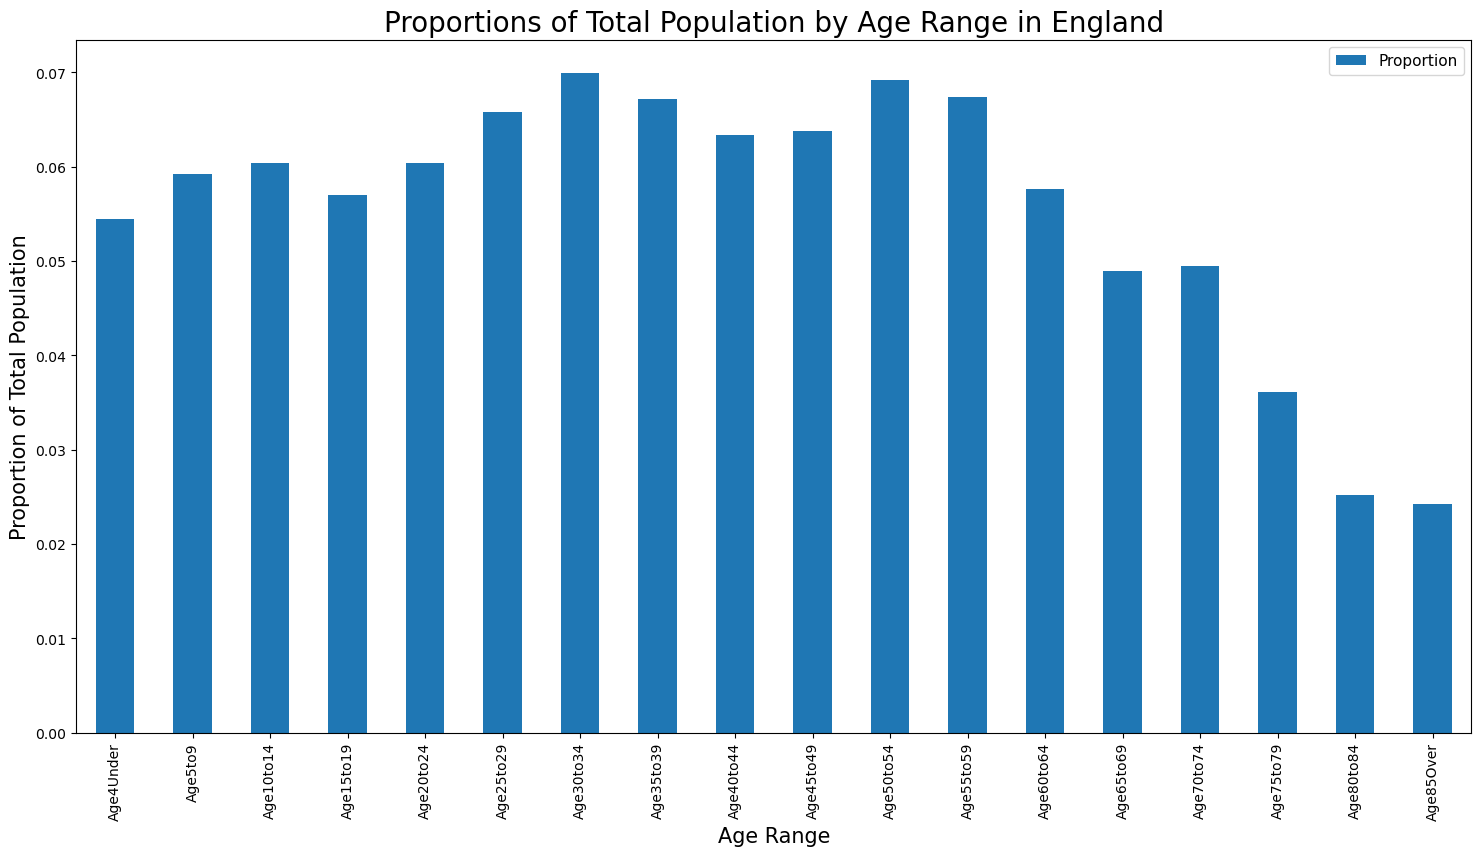

In [15]:
#1. set index
df_index1 = pd.read_csv('LSOA_data.csv', index_col = ['LSOACode'])

#2. find age columns and calculate proportions
ages = df_index1.loc[:,df_index1.columns[4:22]]
ages_sum = ages.sum()
total_population = ages_sum.sum()
age_proportions = ages_sum/total_population

#3. create new data frame and plot bar chart
proportions_df = pd.DataFrame(data = {'Age_range': age_proportions.index, 'Proportion': age_proportions.values})
bar = proportions_df.plot(kind='bar', x='Age_range', y='Proportion', figsize=(18,9))

#4. label the axis
bar.set_ylabel('Proportion of Total Population', fontsize=15)
bar.set_xlabel('Age Range', fontsize=15)
bar.set_title('Proportions of Total Population by Age Range in England', fontsize=20) 

#5. set legend
bar.legend(loc='upper right', fontsize=11);

*Interpretation:*

- The chart shows that people of working age (between 20-59) make up the largest proportion of the English population, while older age groups (60 and above) make up the smallest proportion.
- This could be due to increased immigration of people of working age and a natural decline in populations (e.g. mortaility rates).
- This age distribution suggests a need for continued investment to support the workforce and increasing pressure on social services to support the older demographics.

##### **2.1.2 Proportional Age Distribution Comparison: Bury, Dorset, Birmingham and England**

This analyses the distribution of the population across different age groups (Age 4 and Under - Age 85 and Over) in different areas (Bury, Dorset, Birmingham and England (as a whole)). This was measured using porportions for each LSOA and England to account for differences in the populations.

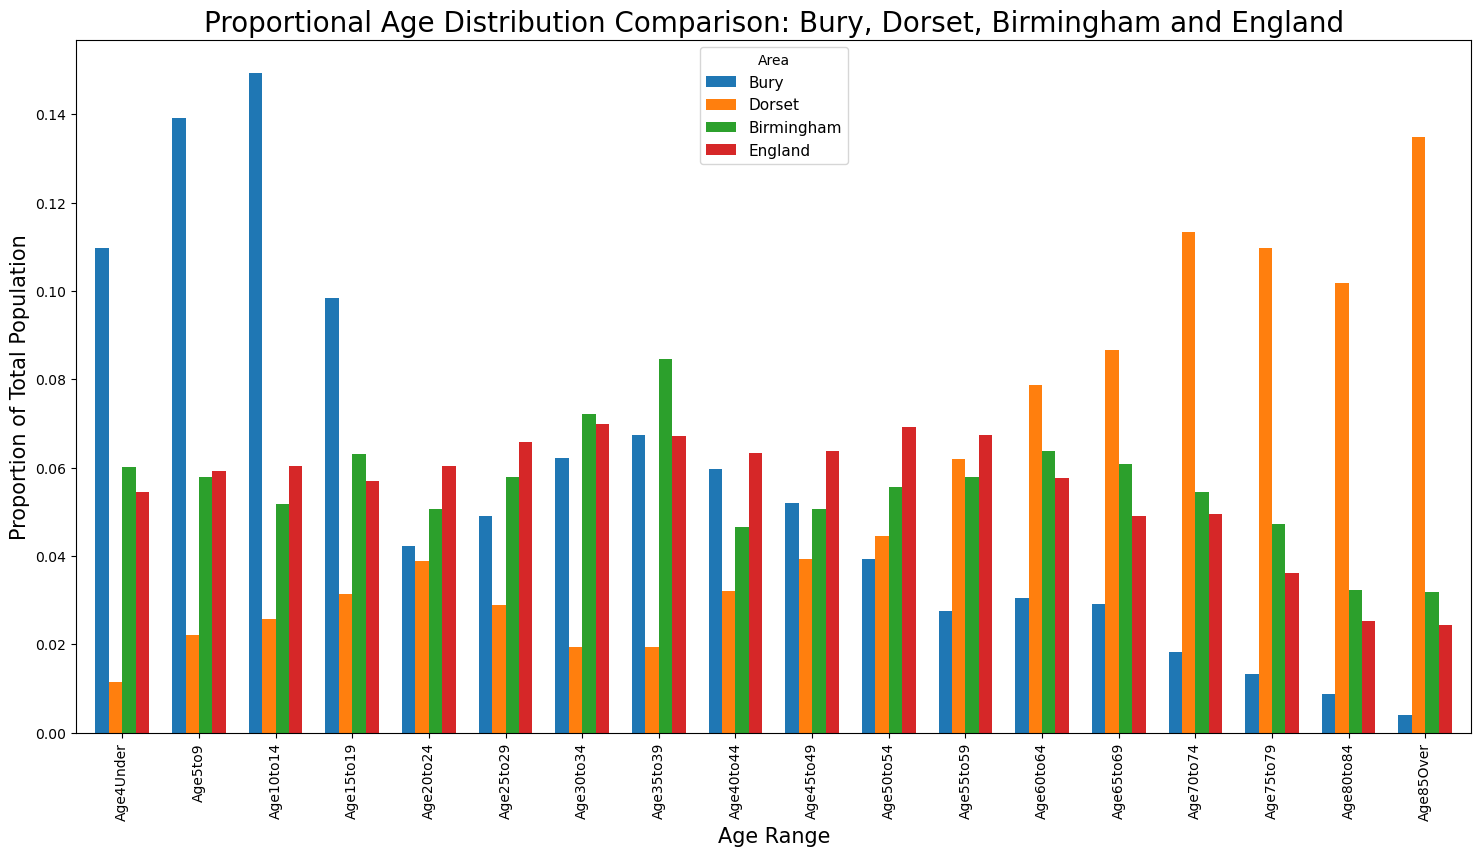

In [19]:
#1. filter and name the 3 LSOAs
LSOAs = df_index1.loc[['E01005044','E01020395','E01009136']]
LSOAs.index = ['Bury', 'Dorset', 'Birmingham']

#2. find proportions for 3 LSOAs, .div() divides each value (axis=0 for column) by corresponding LSOA population 
LSOA_proportions = LSOAs.loc[:, df_index1.columns[4:22]].div(LSOAs['Total'], axis=0)

#3. call the age_proportions from q1 as total for England
LSOA_proportions.loc['England'] = age_proportions

#plot bar chart
bar = LSOA_proportions.transpose().plot(kind='bar', figsize=(18,9), width = 0.7)

#4. label the axis
bar.set_ylabel('Proportion of Total Population', fontsize=15)
bar.set_xlabel('Age Range', fontsize=15)
bar.set_title('Proportional Age Distribution Comparison: Bury, Dorset, Birmingham and England', fontsize=20)

#5. set legend
bar.legend(title = 'Area', loc='upper center', fontsize=11);

*Interpretation:*

Aligning with the defintions outlined by the [Office for National Statistics (Census 2021)](https://www.ons.gov.uk/census/censustransformationprogramme/questiondevelopment/outputandenumerationbasesresidentialaddressandpopulationdefinitionsforcensus2021), the bar chart illustrates how age distributions can be skewed in certain areas compared with the national average. The differences can be influenced by how populations are categorised and where they reside:

1. Communal Establishments

    - Areas with various student accomodations or university campuses may have a higher proportion of younger people (aged 18-24), this could explain the proportions seen in Birmingham.
    - In contrast, areas with care homes and retirement facilities may show a higher proportion of older people (aged 60 and over) which may reflect the skew in Dorset.  
      

2) Usual vs. Short Term Residents

    - Urban areas such as major cities have a lot of short term residents (younger or working age individuals between 20-59) who are counted in the census for a limited time which reflects a more balanced, younger population as seen in birmingham, which is similar to the national average.
    - In contrast, rural areas have fewer short term residents and more usual residents which may skew towards an older, stable community base (60 and over) as seen in Dorset.

3. Household Composition

    - Areas with family-oreinted households may have a higher proportion of younger age groups (0-19) as affordable housing and schools would attract families to live in these suburban areas, as seen in Bury.

4) Migration

    - Inward migration of working age people to cities to take advantage if job opportunities increases the proportion of working ages such as Birmingham which reflects the national average closley. 
    - Outward migration of younger and working age people migrating to cities for education and job opportuntiies, leaves a higher proportion of retired and older age ranges (60 and over) in places such as Dorset.  


### Section 2.2:  Distribution of the Younger, Older and Median Ages in Each LSOA

##### **2.2.1 Calculating Proportions of Younger and Older Residents in each LSOA**

This creates columns that represent younger and older age proportions for each LSOA to add to the data frame by dividing the total population for each area by the total in each age group.

In [24]:
#1. define first four age groups as younger_age
younger_age = df_index1.columns[4:8]

#2. sums the rows (axis=1 for row), divides by the total for the LSO area and assigns to the data frame as 'younger_proportion'
df_index1 = df_index1.assign(Younger_Proportion=df_index1.loc[:, younger_age].apply(sum,axis=1)/df_index1['Total'])

#3. prints the new added column
display(df_index1[['Younger_Proportion']])

,Younger_Proportion
LSOACode,
E01000001,0.095723
E01000002,0.079480
E01000003,0.078735
E01000005,0.200727
E01000006,0.277959
...,...
E01035758,0.153978
E01035759,0.244240
E01035760,0.313043


In [25]:
#1. define last five age groups as older_age
older_age = df_index1.columns[17:22]

#2. sums the rows (axis=1 for row), divides by the total for the LSO area and assigns to the data frame as 'older_proportion'
df_index1 = df_index1.assign(Older_Proportion=df_index1.loc[:, older_age].apply(sum,axis=1)/df_index1['Total'])

#3. prints the new added column
display(df_index1[['Older_Proportion']])

,Older_Proportion
LSOACode,
E01000001,0.251188
E01000002,0.200145
E01000003,0.176689
E01000005,0.094460
E01000006,0.085776
...,...
E01035758,0.273738
E01035759,0.164582
E01035760,0.059006


##### **2.2.2 Estimating the Median Age for each LSOA**

This creates a column of median ages for each LSOA to add to the data frame by determining at which age group 50% of the population is reached and estimating the mean based on this point.

In [28]:
#1. install numpy for cumulation and lower boundaires
import numpy as np

#2. defines age groups and lower boundaries (each group covers 5 years)
age_columns = df_index1.columns[4:22]
lower_boundaries = np.arange(0,85,5)

#3. function to calculate the median for each LSOA (by row)
def median_calculation(row):

    #4. calculates cumulative proportion of the population for each age group
    cumul_proportion = np.cumsum(row[age_columns].values)/row['Total']

    #5. finds index where cumulative proportion exceeds 50%
    index = 0
    while cumul_proportion[index] < 0.5:
        index += 1

    #6. sets the previous fraction to the cumulative proportion of the previous age group
    prev_fract = 0
    if index > 0:
        prev_fract = cumul_proportion[index-1]

    #7. calculates remainder and the fraction increase in the current age group
    remainder = 0.5 - prev_fract
    fract_increase = cumul_proportion[index] - prev_fract

    #8. estimates median age within the identified age group using interpolation
    median_age = lower_boundaries[index]+ 5 * (remainder/fract_increase)
    return median_age

#9. applies median calculation to each row and adds new column 'Median_Age'
df_index1 = df_index1.assign(Median_Age = df_index1.apply(median_calculation, axis=1))

#10. prints the new added column and data frame
display(df_index1[['Median_Age']])

,Median_Age
LSOACode,
E01000001,44.276316
E01000002,43.913043
E01000003,43.896396
E01000005,34.851695
E01000006,34.454023
...,...
E01035758,44.888060
E01035759,40.027473
E01035760,31.716102


##### **2.2.3 Summary Statistics and Distributions of Population Proportions**

In [30]:
#1. shows summary statistics of 4 columns
summary_stats = df_index1[['Total','Younger_Proportion','Older_Proportion','Median_Age']].describe()
display(summary_stats)

,Total,Younger_Proportion,Older_Proportion,Median_Age
count,33755.000000,33755.000000,33755.000000,33755.000000
mean,1673.532543,0.227832,0.189168,42.032147
std,353.289631,0.055301,0.085520,7.782742
min,999.000000,0.018081,0.000736,14.530516
25%,1443.000000,0.192297,0.123995,36.128752
50%,1608.000000,0.223183,0.182751,41.460674
75%,1835.000000,0.258689,0.246851,47.821934
max,9900.000000,0.628793,0.655409,71.875000


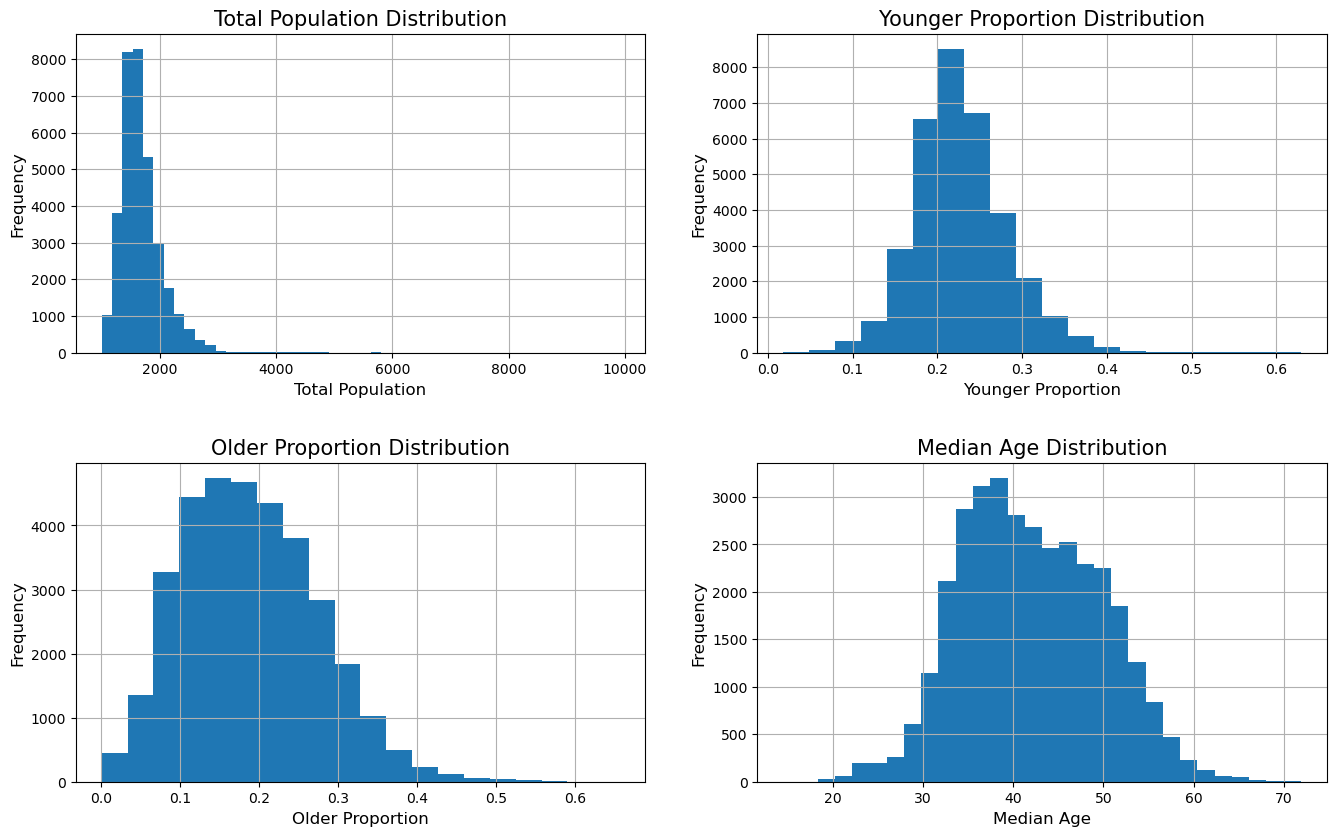

In [31]:
#1. import matplotlib for 
import matplotlib.pyplot as plt
%matplotlib inline

#2. plot histograms

#sets layout
fig, axs = plt.subplots(2,2, figsize=(14,9))

#total population
df_index1['Total'].hist(bins=50, ax=axs[0, 0])
axs[0, 0].set_title('Total Population Distribution', fontsize=15)
axs[0, 0].set_xlabel('Total Population', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)

df_index1['Younger_Proportion'].hist(bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Younger Proportion Distribution', fontsize=15)
axs[0, 1].set_xlabel('Younger Proportion', fontsize=12)
axs[0, 1].set_ylabel('Frequency', fontsize=12)

df_index1['Older_Proportion'].hist(bins=20, ax=axs[1, 0])
axs[1, 0].set_title('Older Proportion Distribution', fontsize=15)
axs[1, 0].set_xlabel('Older Proportion', fontsize=12)
axs[1, 0].set_ylabel('Frequency', fontsize=12)

df_index1['Median_Age'].hist(bins=30, ax=axs[1, 1])
axs[1, 1].set_title('Median Age Distribution', fontsize=15)
axs[1, 1].set_xlabel('Median Age', fontsize=12)
axs[1, 1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout(pad=3) #spaces between graphs
plt.show()

*Interpretation:*

- The total population is skewed to the left where most areas are culstured around 2000 or less, this shows there are very few areas with high populations
- The younger proportion distribution is skewed a bit to the left concentrated between 20-30% and froms a bell-shaped curve, this suggests most areas have similar porportions of younger people with very few having higher and lower proportions
- The older proportion distrubution is skewed more to the left in comparison to the younger proportion with most areas having around 10-20% of older residents, with very few areas having a high porportion
- The median age distrubiton forms a bell shaped curve with most areas have a median age between 30 and 50 years, he symetricial nature shows that there are as many areas with younger median ages as older ones

##### **2.2.4 Median Age Comparison: England and LSOA Median Age Percentiles**

This calculates and compares the median age for the whole of England with the 50th percentile value of the distribution of median ages by LSOA.

In [35]:
age_columns = df_index1.columns[4:22]
lower_boundaries = np.arange(0,85,5)

#1. calculates the total population for each age group and the total population of england
total_population_age = df_index1[age_columns].sum()
total_population = df_index1['Total'].sum()

#2. function to calculate the median age for england
def median_calculation2(population_counts, total_population):

    #3. calculates cumulative proportion of the population for each age group
    cumul_proportion_england = np.cumsum(population_counts)/total_population

    #4. finds index where cumulative proportion exceeds 50%
    index = 0
    while cumul_proportion_england[index] < 0.5:
        index += 1

    #5. sets the previous fraction to the cumulative proportion of the previous age group
    prev_fract = 0
    if index > 0:
        prev_fract = cumul_proportion_england[index-1]

    #6. calculates remainder and the fraction increase in the current age group
    remainder = 0.5 - prev_fract
    fract_increase = cumul_proportion_england[index] - prev_fract

    #7. estimates median age within the identified age group using interpolation
    median_age = lower_boundaries[index]+ 5 * (remainder/fract_increase)
    return median_age

#8. Call function for median age of england and find 50th percentile of LSOA median ages
median_age_england = median_calculation2(total_population_age.values, total_population)
median_age_percentile = df_index1['Median_Age'].median()

print("The overall median age for england is:",median_age_england)
print("The 50th percentile of median ages by  LSOA is:", median_age_percentile)


The overall median age for england is: 40.4322611250074
The 50th percentile of median ages by  LSOA is: 41.46067415730337


In [36]:
#find the highest and lowest median ages and which LSOA it belongs to
lowest_median_lsoa = df_index1.nsmallest(1, 'Median_Age')
highest_median_lsoa = df_index1.nlargest(1, 'Median_Age')

display(lowest_median_lsoa[['Median_Age']], highest_median_lsoa[['Median_Age']])

#find out where each LSOA
lsoa_code1 = 'E01005614'
url = f"https://statistics.data.gov.uk/atlas/resource?uri=http://statistics.data.gov.uk/id/statistical-geography/{lsoa_code1}"

lsoa_code2 = 'E01019957'
url = f"https://statistics.data.gov.uk/atlas/resource?uri=http://statistics.data.gov.uk/id/statistical-geography/{lsoa_code2}"

print("Lowest median age lsoa", lsoa_code1, url)
print("Highest median age lsoa", lsoa_code2, url)

,Median_Age
LSOACode,
E01005614,14.530516


,Median_Age
LSOACode,
E01019957,71.875


Lowest median age lsoa E01005614 https://statistics.data.gov.uk/atlas/resource?uri=http://statistics.data.gov.uk/id/statistical-geography/E01019957
Highest median age lsoa E01019957 https://statistics.data.gov.uk/atlas/resource?uri=http://statistics.data.gov.uk/id/statistical-geography/E01019957


*Interpretation:*

- The overall median age for England is 40.43, in contrast the 50th percentile of median ages by LSOA is 41.46, they differ due to what they both represent.
- The overall median age for England is calculated by pooling all people across LSOAs which averages out the differences between local areas making the distribution more generalised, whereas the 50th percentile of the LSOA's median ages focuses on more local populations which reflects more specific age distributions within each LSOA.
- The LSOA sizes differ, so areas with younger or older populations can also impact the LSOA-based median in comparison to the national one. For example, Salford in Manchester has the lowest median age of 14.53 years which reflects the pattern of higher younger populations in major cities as seen in Birmigham. In contrast, the highest median age of 71.88 years is found in East Devon reflecting the higher older population patterns found in other rural areas such as Dorset. Overall, emphasising how local demographics influence the LSOA-based median age.

### Section 2.3:  Comparing the Median Age Distributions by Area Type

##### **2.3.1 Grouping Area Type of each LSOA**

This groups the dataframe by area type by categorising the areas based on the first three characters:

| First 3 Characters of PartOfCode  |      Type of Area             | 
|:--------------|:-----------------------------|
|E06     | **Unitary Authorities**: typically more urban areas. One example is code E06000004 which is Stockton-on-Tees| 
|E07       | **Non-metropolitan Districts**: more rural. One example is E07000085 which is East Hampshire| 
|E08     | **Metropolitan Districts**: more urban areas. One example is Coventry with code E08000026| 
|E09     | **London Borough**: one example is E09000030 Tower Hamlets which includes QMUL’s Mile End campus|


In [42]:
#1. function to categorise partofcode and return matching area type
def area_types(row):
    if row.PartOfCode[:3] == 'E06':
        return 'Unitary Authorities'
    elif row.PartOfCode[:3] == 'E07':
        return 'Non-metropolitan Districts'
    elif row.PartOfCode[:3] == 'E08':
        return 'Metropolitan Districts'
    elif row.PartOfCode[:3] == 'E09':
        return 'London Borough'

#2. create new column area type and group the data by area type
df_index1 = df_index1.assign(Area_Type = df_index1.apply(area_types, axis=1))
grouped_df_index1 = df_index1.groupby('Area_Type')

#3. present each area type table
for area_type, group in grouped_df_index1:
    print("Area Type:", area_type)
    display(group[['PartOfCode', 'Area_Type']].head())


Area Type: London Borough


,PartOfCode,Area_Type
LSOACode,,
E01000001,E09000001,London Borough
E01000002,E09000001,London Borough
E01000003,E09000001,London Borough
E01000005,E09000001,London Borough
E01000006,E09000002,London Borough


Area Type: Metropolitan Districts


,PartOfCode,Area_Type
LSOACode,,
E01004766,E08000001,Metropolitan Districts
E01004767,E08000001,Metropolitan Districts
E01004768,E08000001,Metropolitan Districts
E01004769,E08000001,Metropolitan Districts
E01004770,E08000001,Metropolitan Districts


Area Type: Non-metropolitan Districts


,PartOfCode,Area_Type
LSOACode,,
E01017943,E07000008,Non-metropolitan Districts
E01017944,E07000008,Non-metropolitan Districts
E01017945,E07000008,Non-metropolitan Districts
E01017946,E07000008,Non-metropolitan Districts
E01017947,E07000008,Non-metropolitan Districts


Area Type: Unitary Authorities


,PartOfCode,Area_Type
LSOACode,,
E01011949,E06000001,Unitary Authorities
E01011950,E06000001,Unitary Authorities
E01011951,E06000001,Unitary Authorities
E01011952,E06000001,Unitary Authorities
E01011953,E06000001,Unitary Authorities


##### **2.3.2 Median Age Distrubution Comparison: London Borough, Metropolitan Districts, Non-Metropolitan Districts, Unitary Authorities**

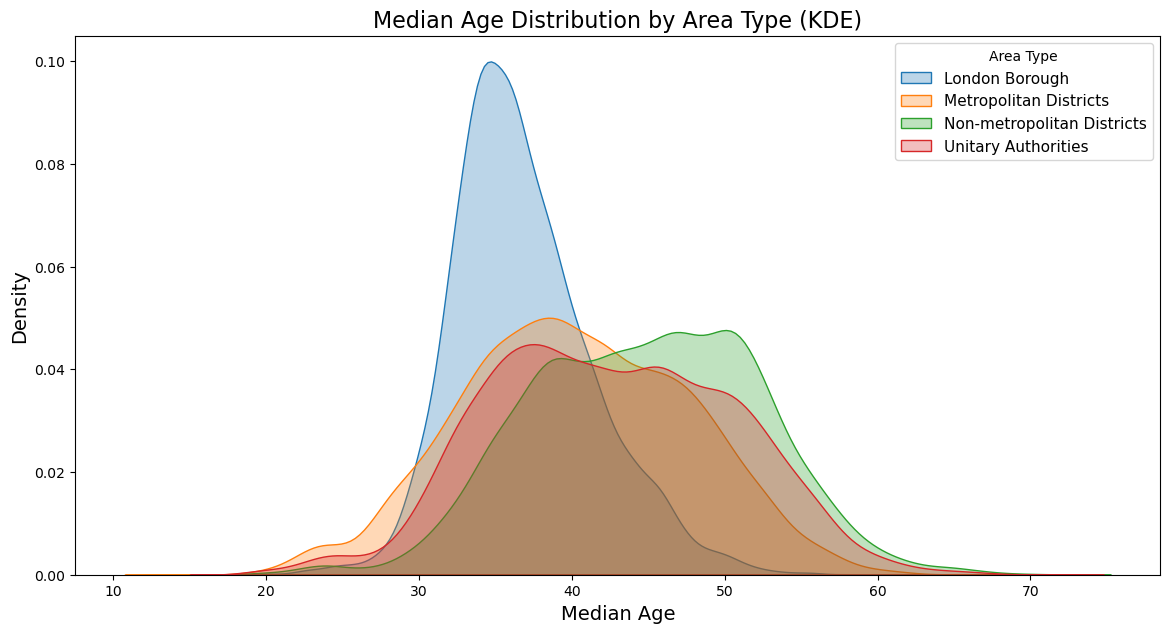

In [44]:
#plot kde
import seaborn as sns

fig, axs = plt.subplots(figsize=(14,7))

for area_type, group in grouped_df_index1:
    sns.kdeplot(group['Median_Age'], label=area_type, ax=axs, fill=True, alpha=0.3)

axs.set_title('Median Age Distribution by Area Type (KDE)', fontsize=16)
axs.set_xlabel('Median Age', fontsize=14)
axs.set_ylabel('Density', fontsize=14)
axs.legend(title='Area Type', fontsize=11);

*Interpretation:*

- The KDE graph shows the following:
- London boroughs have the youngest median age with a peak at around 30 years suggesting a younger population overall following that of other cities such as Birmingham and Manchester.
- Metropolitian Districts display a broader distribution with a softer peak in comparison to the London Boroughs, closer to 35-40 years, suggesting a more balanced but younger population distributon.
- Non-Metropolitian Districts also display a broader distrbution but a more gradual peak centered around 45-50 years, suggesting a more older population distribution seen in rural areas such as Dorset.
- Unitary Authorities show a similar distribution to the Metropolitian Districts but with a older peakaround 40-45 with a population distribution between that of Metropolitian and Non-Metropolitian Districts.
- Overall the KDE presents the London Boroughs with a significantly younger population distribution, while the other area types have overlapping population distributions, leaning towards older ages.

### Section 2.4:  Classification of Unusual Areas by Proportions

##### **2.4.1 Scatter Plot: Younger vs Older Proportions**

This compares the younger and older proportions across the LSO areas within a scatter plot, each LSOA represented by one data point.

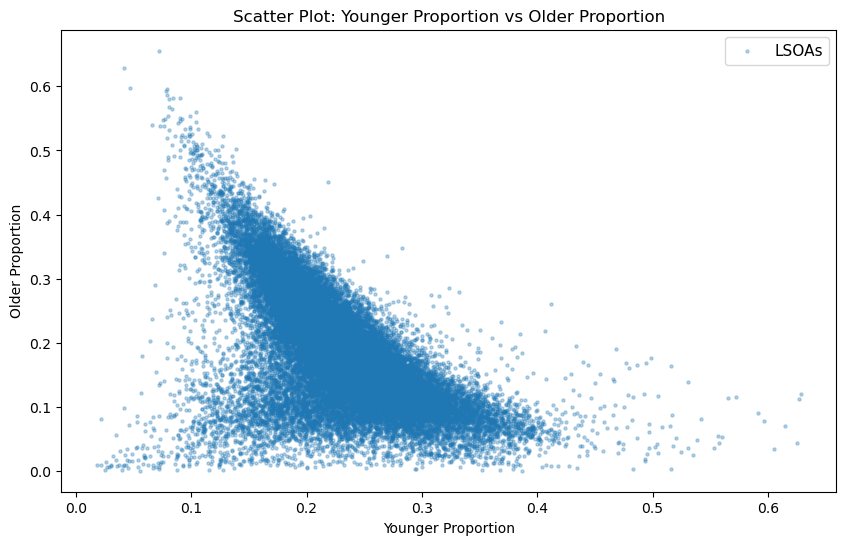

In [84]:
#plot scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_index1['Younger_Proportion'],df_index1['Older_Proportion'], s=5, alpha=0.3)

plt.xlabel('Younger Proportion')
plt.ylabel('Older Proportion')
plt.title('Scatter Plot: Younger Proportion vs Older Proportion')
plt.legend(['LSOAs'],fontsize=11)

plt.show()

*Interpretation:*

- The scatter plot forms a triangular shape showing an overall inverse relationship between younger and older proportions.
- Most points cluster in the middle-left representing moderate younger proportions and lower older proportions, suggesting most LSOAs have a younger-skewed population.
- The three extreme corners represent areas with high younger/low older proportions (bottom-right), high older/low younger proportions (top-left) and low proportions for both older and younger (bottom-left).

##### **2.4.2 Pivot Table: Classifications by Area Type**

This defines each area type as identified from the scatter plot (normal, youth, workers, mature) and the number of areas of each class is calculated using a pivot table and plotted (excluding the normal distributions).

In [51]:
#1. function to set rules of the three extreme corners
def class_rules(row):
    if row['Younger_Proportion'] >= 0.35 and row['Older_Proportion'] <= 0.15:
        return 'Youth'
    if row['Younger_Proportion'] <= 0.15 and row['Older_Proportion'] <= 0.15:
        return 'Workers'
    if row['Younger_Proportion'] <= 0.15 and row['Older_Proportion'] >= 0.4:
        return 'Mature'
    else:
        return 'Normal'

#2. add column to dataset
df_index1 = df_index1.assign(Classification = df_index1.apply(class_rules, axis=1))

#3. prints the new added column
display(df_index1[['Younger_Proportion', 'Older_Proportion', 'Classification']])

,Younger_Proportion,Older_Proportion,Classification
LSOACode,,,
E01000001,0.095723,0.251188,Normal
E01000002,0.079480,0.200145,Normal
E01000003,0.078735,0.176689,Normal
E01000005,0.200727,0.094460,Normal
E01000006,0.277959,0.085776,Normal
...,...,...,...
E01035758,0.153978,0.273738,Normal
E01035759,0.244240,0.164582,Normal
E01035760,0.313043,0.059006,Normal


Classification,Mature,Workers,Youth
Area_Type,,,
London Borough,1,272,82
Metropolitan Districts,25,149,425
Non-metropolitan Districts,233,62,95
Unitary Authorities,121,137,203


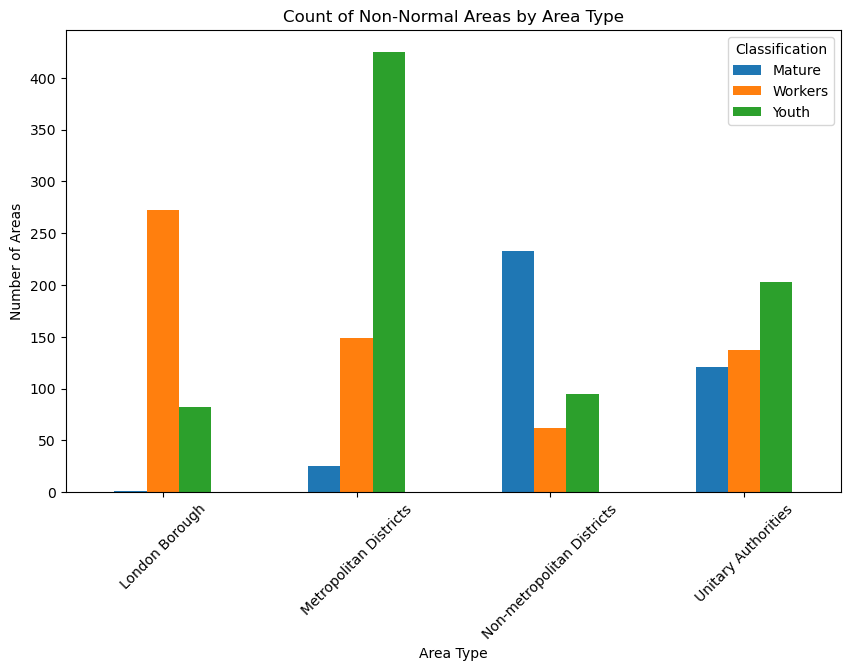

In [52]:
#1. pivot calculates the no. areas of each class in each type of area 
class_pivot = pd.pivot_table(df_index1, index='Area_Type', columns='Classification', values='LSOAName', aggfunc='count', fill_value=0)

#2. exclude the normal areas from the pivot
class_pivot_filtered = class_pivot.drop(columns=['Normal'], errors='ignore')

#3. print new column and plot graph
display(class_pivot_filtered)

class_pivot_filtered.plot(kind='bar', figsize=(10,6)) 

plt.xlabel('Area Type')
plt.ylabel('Number of Areas')
plt.title('Count of Non-Normal Areas by Area Type')
plt.xticks(rotation=45);
                         

*Interpretation:*

- The bar chart shows that Youth-dominated areas, high proportions of younger residents, are mostly concentrated in the Metropolitan Districts followed by Unitary Authorities, this reflects the trend of younger families in urban areas as seen in Bury. 
- Worker-dominated areas, lower proportions of young and old, are found mostly in the London Boroughs followed by the Metropolitan Districts, this reflects cities work opportunities and inward migration.
- Mature-dominated areas, high proportions of older residents, are found mostly in Non-metropolitan Districts, consistent with rural areas such as Dorset where retirement communities are more common.